# EV Sales Market

## Library Imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the dataset file

In [3]:
df = pd.read_csv("Indian automoble buying behavour study 1.0.csv")

In [4]:
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000


## Added an age group column

In [5]:
df['Age_Group'] = pd.cut(df['Age'], bins=[25, 30, 35, 40, 45, 50, 55], labels=['25-30', '31-35', '36-40', '41-45', '46-50', '51-55'])

In [6]:
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Age_Group
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,25-30
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,31-35
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,41-45
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,41-45
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,31-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000,25-30
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000,46-50
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000,51-55
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000,51-55


## Age Statistics of car make

In [33]:
age_make_stats = df.groupby('Make')['Age'].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()
print(age_make_stats.sort_values('mean'))

      Make       mean  median  min  max  count
0   Baleno  33.421053    33.0   27   46     19
8      i20  33.500000    34.5   26   42     12
7    Verna  34.000000    35.0   29   37      4
2     City  34.000000    34.5   28   41     10
6      SUV  37.421053    36.0   27   50     19
1     Ciaz  37.916667    35.5   27   51     12
3   Creata  38.714286    39.0   30   51     14
4   Duster  40.571429    41.0   34   49      7
5  Luxuray  45.000000    45.0   41   49      2


## Inferential Statistics of the Age column in regards to other columns

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24456\167071184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Make', y='Age', data=df, palette='viridis')


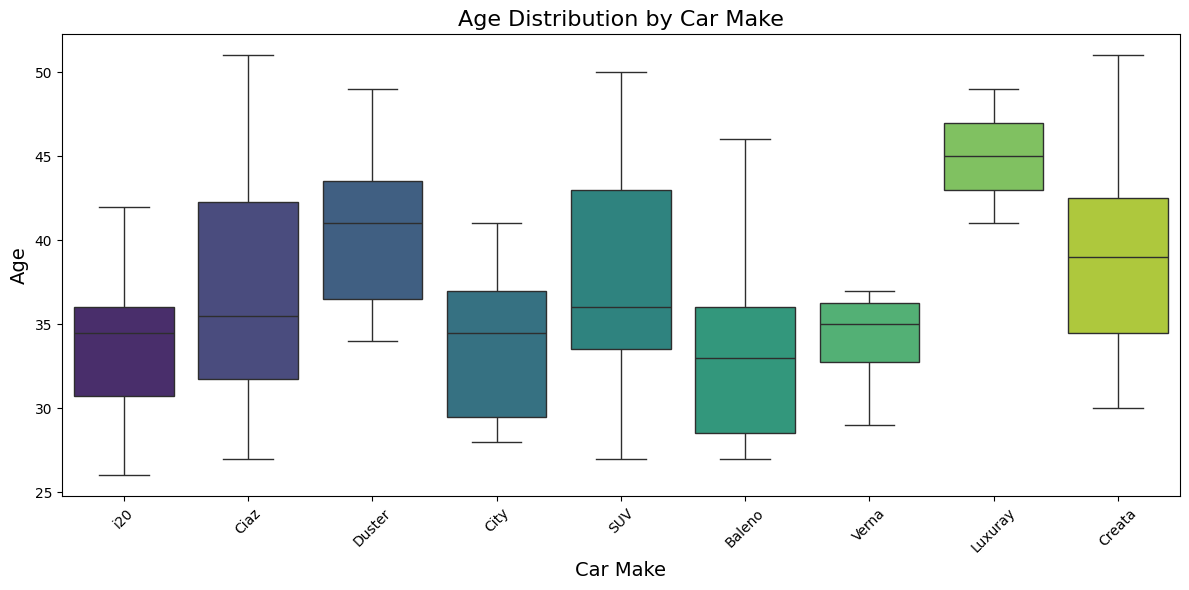

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Age', data=df, palette='viridis')
plt.title('Age Distribution by Car Make', fontsize=16)
plt.xlabel('Car Make', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

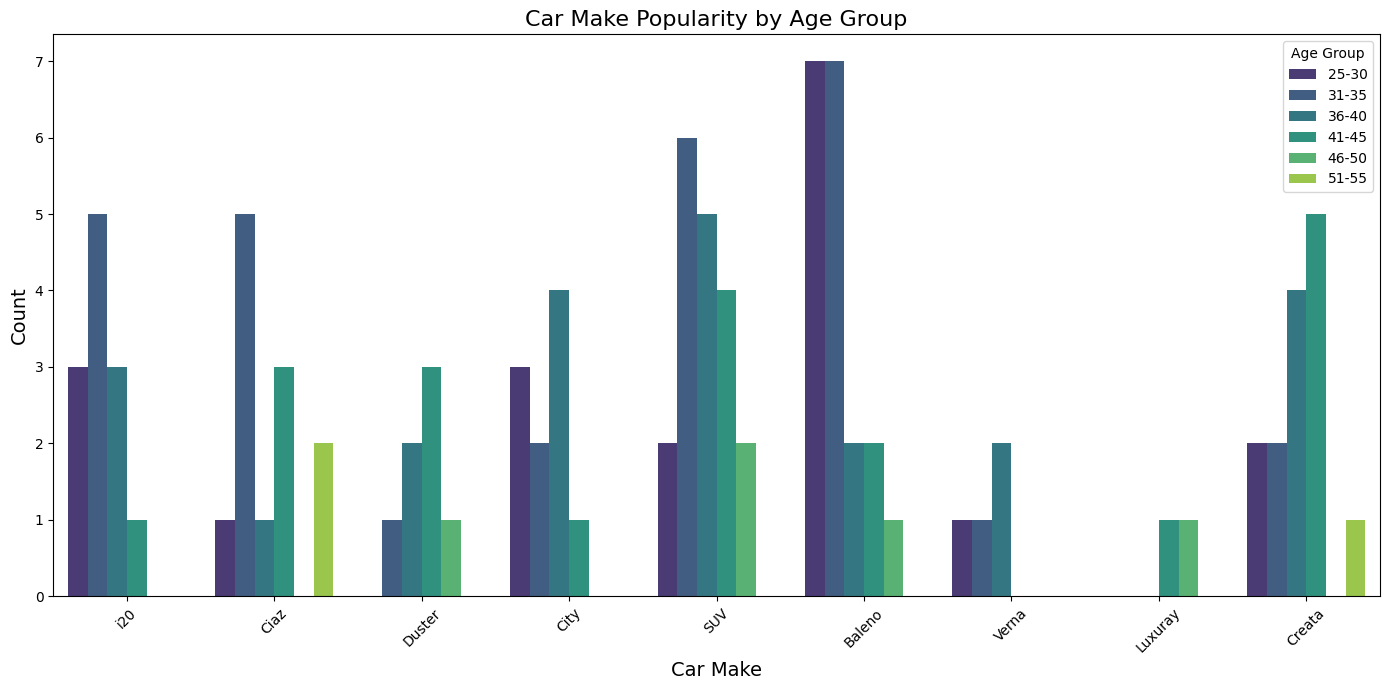

In [9]:
plt.figure(figsize=(14, 7))
sns.countplot(x='Make', hue='Age_Group', data=df, palette='viridis')
plt.title('Car Make Popularity by Age Group', fontsize=16)
plt.xlabel('Car Make', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

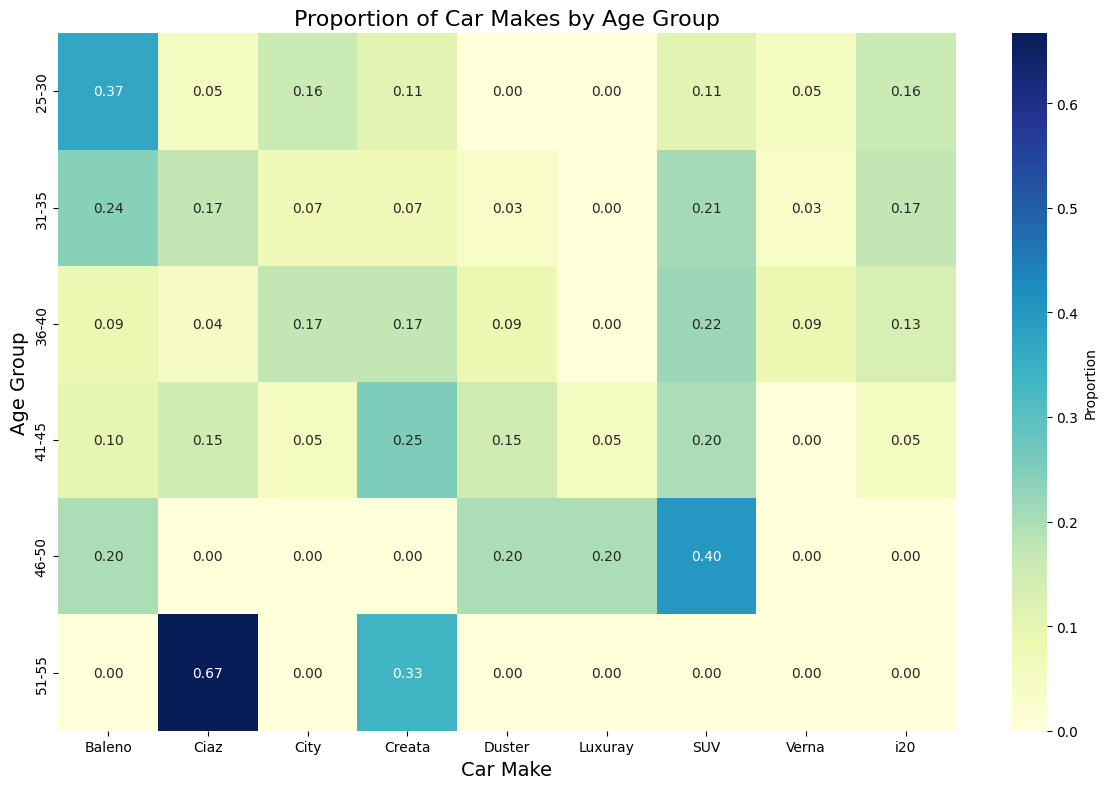

In [10]:
plt.figure(figsize=(12, 8))
age_make_crosstab = pd.crosstab(df['Age_Group'], df['Make'], normalize='index')
sns.heatmap(age_make_crosstab, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Proportion'})
plt.title('Proportion of Car Makes by Age Group', fontsize=16)
plt.xlabel('Car Make', fontsize=14)
plt.ylabel('Age Group', fontsize=14)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Individual Salary')

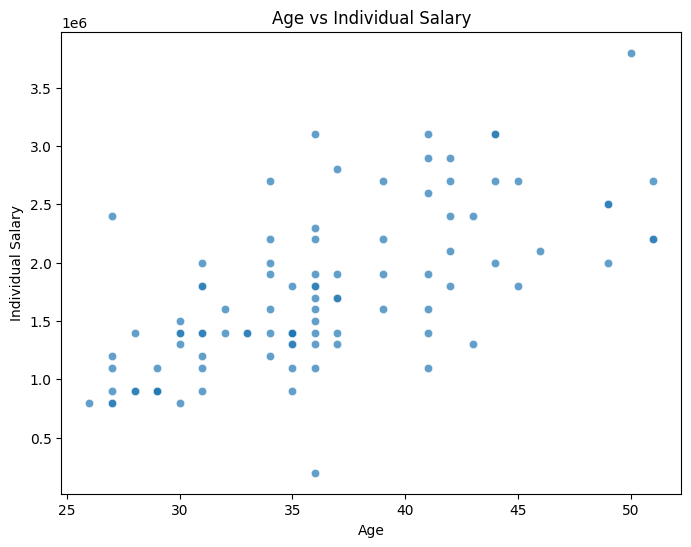

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=df, alpha=0.7)
plt.title('Age vs Individual Salary')
plt.xlabel('Age')
plt.ylabel('Individual Salary')

Text(0, 0.5, 'Total Salary')

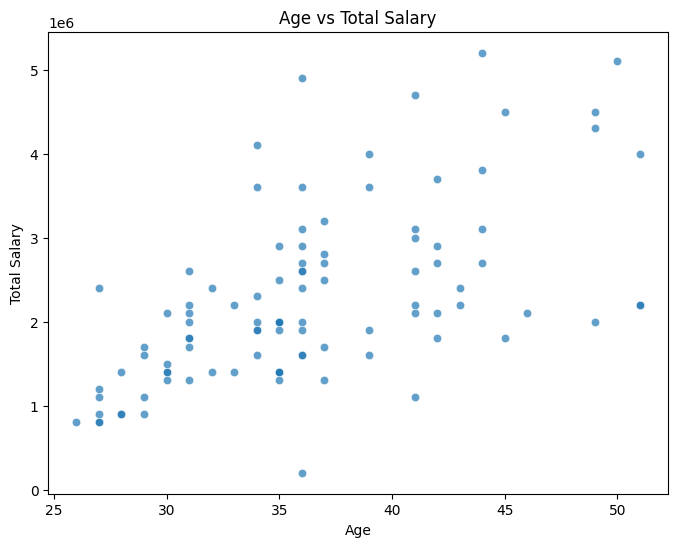

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Total Salary', data=df, alpha=0.7)
plt.title('Age vs Total Salary')
plt.xlabel('Age')
plt.ylabel('Total Salary')

In [15]:
age_salary = df.groupby('Age_Group')[['Salary', 'Total Salary']].mean().reset_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24456\2584691571.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_salary = df.groupby('Age_Group')[['Salary', 'Total Salary']].mean().reset_index()


Text(0, 0.5, 'Average Salary')

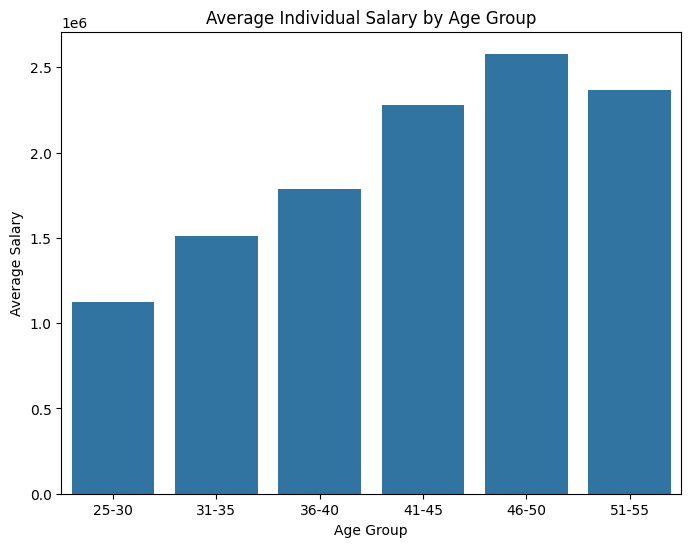

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='Salary', data=age_salary)
plt.title('Average Individual Salary by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Salary')

Text(0, 0.5, 'Average Total Salary')

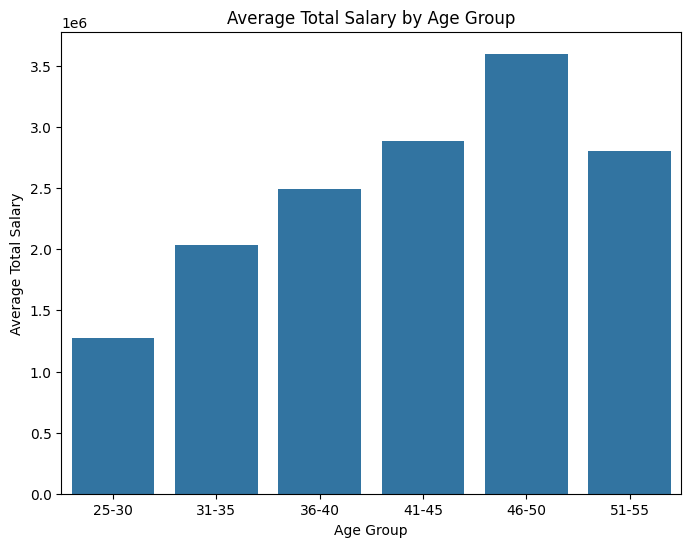

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='Total Salary', data=age_salary)
plt.title('Average Total Salary by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Salary')

Text(0, 0.5, 'Age')

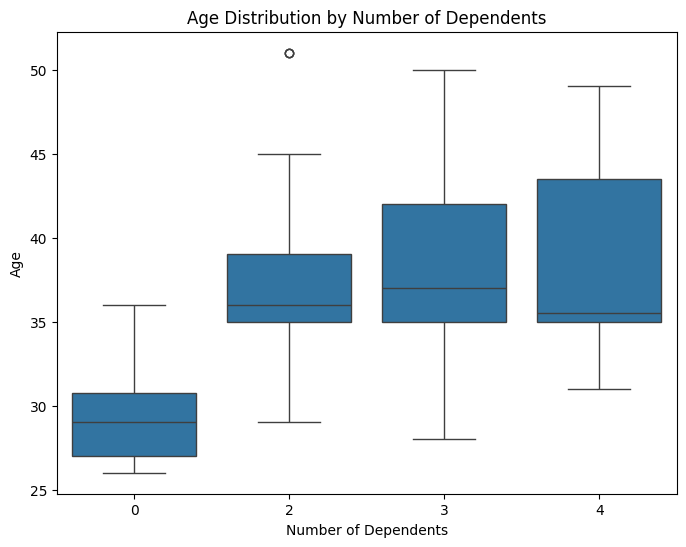

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='No of Dependents', y='Age', data=df)
plt.title('Age Distribution by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Age')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24456\2256067063.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dependent_age = df.groupby('Age_Group')['No of Dependents'].mean().reset_index()


Text(0, 0.5, 'Average Dependents')

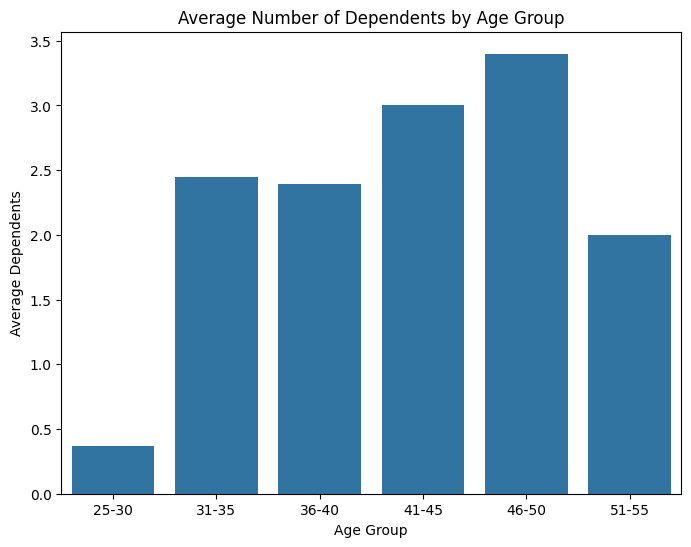

In [23]:
plt.figure(figsize=(8, 6))
dependent_age = df.groupby('Age_Group')['No of Dependents'].mean().reset_index()
sns.barplot(x='Age_Group', y='No of Dependents', data=dependent_age)
plt.title('Average Number of Dependents by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Dependents')

In [24]:
df['Personal_Loan_Numeric'] = df['Personal loan'].map({'Yes': 1, 'No': 0})
df['House_Loan_Numeric'] = df['House Loan'].map({'Yes': 1, 'No': 0})

In [25]:
loan_by_age = df.groupby('Age_Group')[['Personal_Loan_Numeric', 'House_Loan_Numeric']].mean().reset_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24456\2865489084.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_by_age = df.groupby('Age_Group')[['Personal_Loan_Numeric', 'House_Loan_Numeric']].mean().reset_index()


(0.0, 1.0)

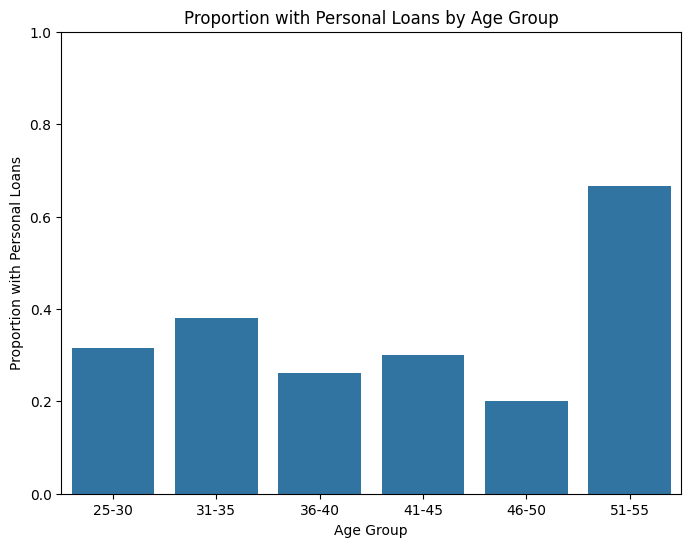

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='Personal_Loan_Numeric', data=loan_by_age)
plt.title('Proportion with Personal Loans by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion with Personal Loans')
plt.ylim(0, 1)

(0.0, 1.0)

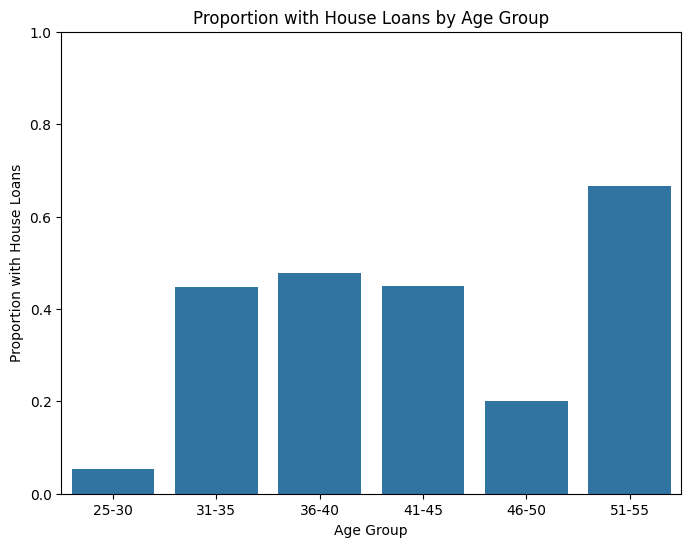

In [31]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='House_Loan_Numeric', data=loan_by_age)
plt.title('Proportion with House Loans by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion with House Loans')
plt.ylim(0, 1)

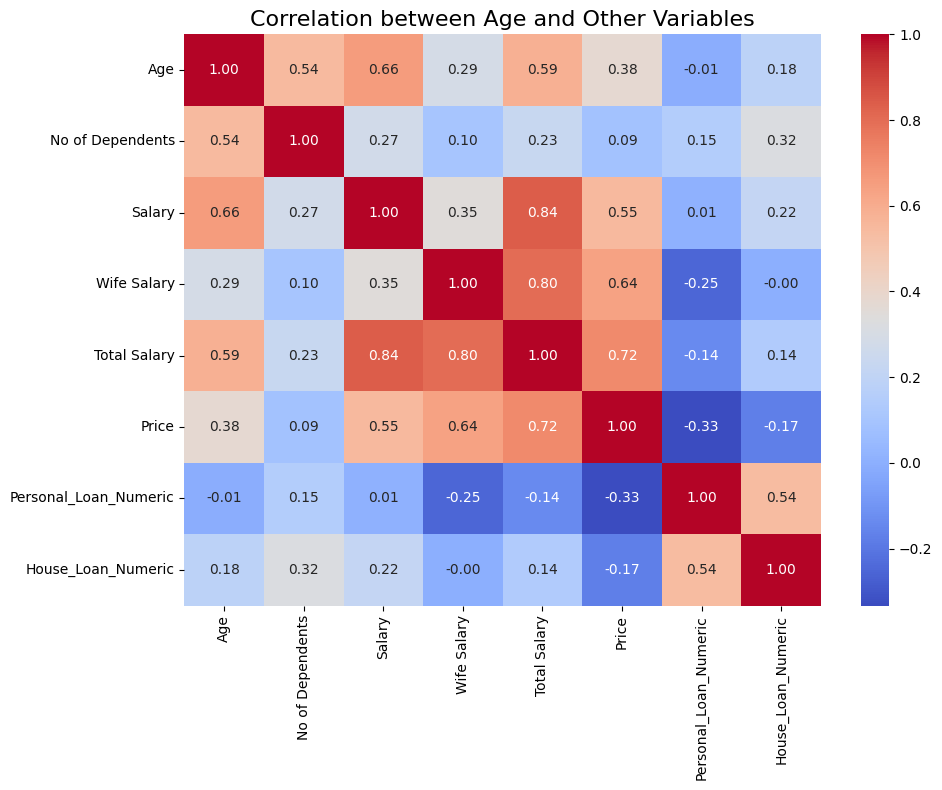

In [32]:
plt.figure(figsize=(10, 8))
numeric_cols = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 
                'Total Salary', 'Price', 'Personal_Loan_Numeric', 'House_Loan_Numeric']
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Age and Other Variables', fontsize=16)
plt.tight_layout()